In [1]:
datapath="/content/conflict_data_bgd.csv"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df=pd.read_csv(datapath)
#df.iloc[1:100,7:15]
df.columns

Index(['data_id', 'iso', 'event_id_cnty', 'event_id_no_cnty', 'event_date',
       'year', 'time_precision', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'inter1', 'actor2', 'assoc_actor_2', 'inter2',
       'interaction', 'region', 'country', 'admin1', 'admin2', 'admin3',
       'location', 'latitude', 'longitude', 'geo_precision', 'source',
       'source_scale', 'notes', 'fatalities', 'timestamp', 'iso3'],
      dtype='object')

In [3]:
df=df.drop([0],axis=0)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


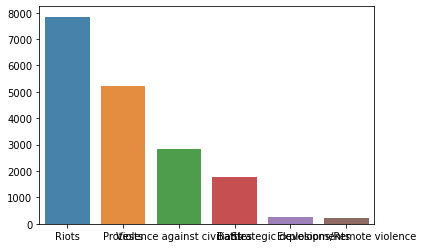

In [4]:
s=df['event_type'].value_counts()
sns.barplot(s.index,s.values,alpha=0.9)

In [5]:
df['event_type'].value_counts()

Riots                         7847
Protests                      5223
Violence against civilians    2834
Battles                       1759
Strategic developments         256
Explosions/Remote violence     217
Name: event_type, dtype: int64

In [6]:
df['event_date']=pd.to_datetime(df['event_date'])

In [7]:
df2=df[['event_date','year','event_type','sub_event_type','actor1',
       'assoc_actor_1','actor2', 'assoc_actor_2','admin1', 'admin2', 'admin3',
       'location','notes', 'fatalities']]

In [8]:
df2.head()

,event_date,year,event_type,sub_event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,admin1,admin2,admin3,location,notes,fatalities
1,2020-11-14,2020,Protests,Peaceful protest,Protesters (Bangladesh),JSD: Jatiya Samajtantrik Dal,NaN,NaN,Dhaka,Dhaka,Dhaka,Dhaka,"On 14 November 2020, members of Jatiya Samajta...",0
2,2020-11-14,2020,Riots,Mob violence,Rioters (Bangladesh),Vigilante Group (Bangladesh),Police Forces of Bangladesh (2009-),NaN,Dhaka,Narayanganj,Narayanganj,Siddhirganj,"On 14 November 2020, a group of 30 to 40 local...",0
3,2020-11-14,2020,Riots,Mob violence,Rioters (Bangladesh),AL: Bangladesh Awami League,Rioters (Bangladesh),AL: Bangladesh Awami League,Khulna,Bagerhat,Bagerhat,Bagerhat,"On 14 November 2020, two factions Awami League...",0
4,2020-11-14,2020,Strategic developments,Arrests,Police Forces of Bangladesh (2009-),NaN,JeI: Jamaat-e-Islami,NaN,Khulna,Kushtia,Kushtia,Jhaudia,"Arrests: On 14 November 2020, police arrested ...",0
5,2020-11-13,2020,Protests,Peaceful protest,Protesters (Bangladesh),Hindu Group (Bangladesh),NaN,NaN,Dhaka,Dhaka,Dhaka,Dhaka-Paltan,"On 13 November 2020, members of Bangladesh Jat...",0


In [9]:
df2["violence"]=np.nan

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [10]:
df2.columns

Index(['event_date', 'year', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'actor2', 'assoc_actor_2', 'admin1', 'admin2',
       'admin3', 'location', 'notes', 'fatalities', 'violence'],
      dtype='object')

In [11]:
for i in df2.index:
    if 'injured' in df2['notes'][i]:
        df2['violence'][i]=1.0
    
        #print(df2['violence'][i])
        #print('success')
       
    else:
        df2['violence'][i]=0.0
        #print(df2['violence'][i])
        #print('okay')
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate f

In [12]:
df2['violence'].value_counts()

0.0    11909
1.0     6227
Name: violence, dtype: int64

In [13]:

show=df2['admin1'].value_counts()
print(show['Dhaka'])
#plt.show()
#df2=df2.drop([0],axis=0)
#df2.head()

#sns.countplot(x='location',data=df2,dodge=False)
#sns.countplot(x='actor1',data=df2,dodge=False)
df2.columns

6130


Index(['event_date', 'year', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'actor2', 'assoc_actor_2', 'admin1', 'admin2',
       'admin3', 'location', 'notes', 'fatalities', 'violence'],
      dtype='object')

In [14]:
cdf=df2.copy()


In [15]:
cdf.head()

,event_date,year,event_type,sub_event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,admin1,admin2,admin3,location,notes,fatalities,violence
1,2020-11-14,2020,Protests,Peaceful protest,Protesters (Bangladesh),JSD: Jatiya Samajtantrik Dal,NaN,NaN,Dhaka,Dhaka,Dhaka,Dhaka,"On 14 November 2020, members of Jatiya Samajta...",0,0.0
2,2020-11-14,2020,Riots,Mob violence,Rioters (Bangladesh),Vigilante Group (Bangladesh),Police Forces of Bangladesh (2009-),NaN,Dhaka,Narayanganj,Narayanganj,Siddhirganj,"On 14 November 2020, a group of 30 to 40 local...",0,0.0
3,2020-11-14,2020,Riots,Mob violence,Rioters (Bangladesh),AL: Bangladesh Awami League,Rioters (Bangladesh),AL: Bangladesh Awami League,Khulna,Bagerhat,Bagerhat,Bagerhat,"On 14 November 2020, two factions Awami League...",0,1.0
4,2020-11-14,2020,Strategic developments,Arrests,Police Forces of Bangladesh (2009-),NaN,JeI: Jamaat-e-Islami,NaN,Khulna,Kushtia,Kushtia,Jhaudia,"Arrests: On 14 November 2020, police arrested ...",0,0.0
5,2020-11-13,2020,Protests,Peaceful protest,Protesters (Bangladesh),Hindu Group (Bangladesh),NaN,NaN,Dhaka,Dhaka,Dhaka,Dhaka-Paltan,"On 13 November 2020, members of Bangladesh Jat...",0,0.0


In [16]:
threshold = 50 # Anything that occurs less than this will be removed.
for col in cdf.columns:
  #print(col)
  if col=='assoc_actor_1':
    
    value_counts = cdf[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    cdf[col].replace(to_remove, np.nan, inplace=True)


In [17]:
cdf['assoc_actor_2'].value_counts()

AL: Bangladesh Awami League                              878
BNP: Bangladesh Nationalist Party                        656
BCL: Bangladesh Chhatra League; Students (Bangladesh)    556
Labour Group (Bangladesh)                                339
Jubo League                                              312
                                                        ... 
Kawkhali Ethnic Group (Bangladesh)                         1
Journalists (Bangladesh); Labour Group (Bangladesh)        1
Bhakurta Communal Group (Bangladesh)                       1
Bhagirath Machhari Communal Group (Bangladesh)             1
Char Sherpur Communal Group (Bangladesh)                   1
Name: assoc_actor_2, Length: 977, dtype: int64

In [18]:
threshold = 50 # Anything that occurs less than this will be removed.
for col in cdf.columns:
  #print(col)
  if col=='assoc_actor_2':
    
    value_counts = cdf[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    cdf[col].replace(to_remove, np.nan, inplace=True)


In [19]:
#cdf=cdf.drop([0])

In [20]:
cdf.columns

Index(['event_date', 'year', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'actor2', 'assoc_actor_2', 'admin1', 'admin2',
       'admin3', 'location', 'notes', 'fatalities', 'violence'],
      dtype='object')

In [21]:
print(cdf['assoc_actor_1'].notnull().sum())

9049


In [22]:
cdf.columns

Index(['event_date', 'year', 'event_type', 'sub_event_type', 'actor1',
       'assoc_actor_1', 'actor2', 'assoc_actor_2', 'admin1', 'admin2',
       'admin3', 'location', 'notes', 'fatalities', 'violence'],
      dtype='object')

In [23]:
cdf['event_date']=pd.to_datetime(cdf['event_date'])

In [24]:
cdf['month']=cdf['event_date'].dt.month

In [25]:
cdf=cdf.drop(['event_date'],axis=1)

In [26]:
cdf['actor2'].value_counts()

Civilians (Bangladesh)                       5085
Police Forces of Bangladesh (2009-)          3068
Rioters (Bangladesh)                         2533
AL: Bangladesh Awami League                   222
BCL: Bangladesh Chhatra League                177
                                             ... 
Paschimgaon Communal Militia (Bangladesh)       1
Akbarpur Communal Militia (Bangladesh)          1
Ashutiapara Communal Militia (Bangladesh)       1
Tanmonipara Communal Militia (Bangladesh)       1
Singarkul Communal Militia (Bangladesh)         1
Name: actor2, Length: 539, dtype: int64

FEATURE ENGINEERING


Frequency encoding

In [27]:
count_map_assoc1=cdf.assoc_actor_1.value_counts().to_dict()
count_map_assoc2=cdf.assoc_actor_2.value_counts().to_dict()
count_admin_2=cdf.admin2.value_counts().to_dict()
count_sub_event=cdf.sub_event_type.value_counts().to_dict()
#print(count_map_assoc1)
cdf.assoc_actor_1=cdf.assoc_actor_1.map(count_map_assoc1)
cdf.assoc_actor_2=cdf.assoc_actor_2.map(count_map_assoc2)
cdf.admin2=cdf.admin2.map(count_admin_2)
cdf.sub_event_type=cdf.sub_event_type.map(count_sub_event)


In [28]:
cdf.head()

,year,event_type,sub_event_type,actor1,assoc_actor_1,actor2,assoc_actor_2,admin1,admin2,admin3,location,notes,fatalities,violence,month
1,2020,Protests,4575,Protesters (Bangladesh),NaN,NaN,NaN,Dhaka,4129.0,Dhaka,Dhaka,"On 14 November 2020, members of Jatiya Samajta...",0,0.0,11
2,2020,Riots,4655,Rioters (Bangladesh),253.0,Police Forces of Bangladesh (2009-),NaN,Dhaka,382.0,Narayanganj,Siddhirganj,"On 14 November 2020, a group of 30 to 40 local...",0,0.0,11
3,2020,Riots,4655,Rioters (Bangladesh),875.0,Rioters (Bangladesh),878.0,Khulna,172.0,Bagerhat,Bagerhat,"On 14 November 2020, two factions Awami League...",0,1.0,11
4,2020,Strategic developments,106,Police Forces of Bangladesh (2009-),NaN,JeI: Jamaat-e-Islami,NaN,Khulna,258.0,Kushtia,Jhaudia,"Arrests: On 14 November 2020, police arrested ...",0,0.0,11
5,2020,Protests,4575,Protesters (Bangladesh),NaN,NaN,NaN,Dhaka,4129.0,Dhaka,Dhaka-Paltan,"On 13 November 2020, members of Bangladesh Jat...",0,0.0,11


In [29]:
cdf=cdf.drop(['actor1','actor2','admin3','location','notes'],axis=1)

One-Hot encoding

In [30]:
cdf=pd.get_dummies(cdf,columns=['event_type'],prefix=['event'])

In [31]:
cdf=pd.get_dummies(cdf,columns=['admin1'],prefix=['div'])

In [32]:
cdf['sub_event_type'].value_counts()

4655    4655
4575    4575
3192    3192
2788    2788
1759    1759
559      559
142      142
107      107
106      106
89        89
64        64
34        34
12        24
16        16
15        15
9          9
2          2
Name: sub_event_type, dtype: int64

In [33]:
cdf['year']=cdf['year'].astype(str).astype(int)
cdf['fatalities']=cdf['fatalities'].astype(str).astype(int)

In [34]:
cdf['vio']=cdf['violence']
cdf=cdf.drop('violence',axis=1)

In [35]:
cdf.columns

Index(['year', 'sub_event_type', 'assoc_actor_1', 'assoc_actor_2', 'admin2',
       'fatalities', 'month', 'event_Battles',
       'event_Explosions/Remote violence', 'event_Protests', 'event_Riots',
       'event_Strategic developments', 'event_Violence against civilians',
       'div_Barisal', 'div_Chittagong', 'div_Dhaka', 'div_Khulna',
       'div_Mymensingh', 'div_Rajshahi', 'div_Rangpur', 'div_Sylhet', 'vio'],
      dtype='object')

Neural Network

In [36]:
predictor=cdf[['year', 'sub_event_type', 'assoc_actor_1', 'assoc_actor_2', 'admin2',
       'fatalities', 'month', 'event_Battles',
       'event_Explosions/Remote violence', 'event_Protests', 'event_Riots',
       'event_Strategic developments', 'event_Violence against civilians',
       'div_Barisal', 'div_Chittagong', 'div_Dhaka', 'div_Khulna',
       'div_Mymensingh', 'div_Rajshahi', 'div_Rangpur', 'div_Sylhet']]
target=cdf['vio']


In [37]:
predictor.head()
#predictors_norm = (predictor - predictor.mean()) / predictors.std()
n_col=predictor.shape[1]

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [39]:
def p_model():
  model=Sequential()
  model.add(Dense(50,activation='relu',input_shape=(n_col,)))
  model.add(Dense(50,activation='relu'))
  model.add(Dense(1))

  model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
  return model

In [40]:
model=p_model()

In [41]:
model.fit(predictor,target,validation_split=0.3,epochs=100,verbose=1)


Epoch 1/100
397/397 [==============================] - 3s 3ms/step - loss: 2210.0054 - accuracy: 0.6700 - val_loss: 0.3654 - val_accuracy: 0.6302
Epoch 2/100
397/397 [==============================] - 1s 3ms/step - loss: 0.3248 - accuracy: 0.6679 - val_loss: 0.3494 - val_accuracy: 0.6302
Epoch 3/100
397/397 [==============================] - 1s 3ms/step - loss: 0.3082 - accuracy: 0.6695 - val_loss: 0.3298 - val_accuracy: 0.6302
Epoch 4/100
397/397 [==============================] - 1s 3ms/step - loss: 0.2928 - accuracy: 0.6669 - val_loss: 0.3090 - val_accuracy: 0.6302
Epoch 5/100
397/397 [==============================] - 1s 3ms/step - loss: 0.2669 - accuracy: 0.6770 - val_loss: 0.2892 - val_accuracy: 0.6302
Epoch 6/100
397/397 [==============================] - 1s 3ms/step - loss: 0.2564 - accuracy: 0.6697 - val_loss: 0.2719 - val_accuracy: 0.6302
Epoch 7/100
397/397 [==============================] - 1s 3ms/step - loss: 0.2457 - accuracy: 0.6655 - val_loss: 0.2581 - val_accuracy: 0.6

Random Forest


In [42]:
#cdf['vio']=cdf['violence']
#cdf=cdf.drop('violence',axis=1)
cdf.columns[21]
cdf.fillna(0)

,year,sub_event_type,assoc_actor_1,assoc_actor_2,admin2,fatalities,month,event_Battles,event_Explosions/Remote violence,event_Protests,event_Riots,event_Strategic developments,event_Violence against civilians,div_Barisal,div_Chittagong,div_Dhaka,div_Khulna,div_Mymensingh,div_Rajshahi,div_Rangpur,div_Sylhet,vio
1,2020,4575,0.0,0.0,4129.0,0,11,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0
2,2020,4655,253.0,0.0,382.0,0,11,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0
3,2020,4655,875.0,878.0,172.0,0,11,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0
4,2020,106,0.0,0.0,258.0,0,11,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.0
5,2020,4575,0.0,0.0,4129.0,0,11,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18132,2010,4655,0.0,67.0,172.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0
18133,2010,4575,290.0,0.0,759.0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0.0
18134,2010,1759,1387.0,290.0,271.0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0
18135,2010,559,0.0,878.0,161.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1.0


In [43]:
X=cdf.iloc[:,0:21].values
y=cdf.iloc[:,21].values       

In [44]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier(n_estimators=200,random_state=0)
X_train=np.nan_to_num(X_train)
X_test=np.nan_to_num(X_test)
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

In [48]:
#evalution:

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
accu=accuracy_score(y_test,y_pred)
print('The accuracy of Random Forest Algorithm is: ',accu*100,'%')

[[1986  395]
 [ 395  852]]
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      2381
         1.0       0.68      0.68      0.68      1247

    accuracy                           0.78      3628
   macro avg       0.76      0.76      0.76      3628
weighted avg       0.78      0.78      0.78      3628

0.7822491730981257
The accuracy of Random Forest Algorithm is:  78.22491730981257 %


Neural Network

In [ ]:
#cdf.columns

In [ ]:
'''pra=cdf[['year', 'sub_event_type', 'assoc_actor_1', 'assoc_actor_2', 'admin2',
       'fatalities', 'month', 'event_Battles',
       'event_Explosions/Remote violence', 'event_Protests', 'event_Riots',
       'event_Strategic developments', 'event_Violence against civilians',
       'div_Barisal', 'div_Chittagong', 'div_Dhaka', 'div_Khulna',
       'div_Mymensingh', 'div_Rajshahi', 'div_Rangpur', 'div_Sylhet']]
tar=cdf['vio']'''

"pra=cdf[['year', 'sub_event_type', 'assoc_actor_1', 'assoc_actor_2', 'admin2',\n       'fatalities', 'month', 'event_Battles',\n       'event_Explosions/Remote violence', 'event_Protests', 'event_Riots',\n       'event_Strategic developments', 'event_Violence against civilians',\n       'div_Barisal', 'div_Chittagong', 'div_Dhaka', 'div_Khulna',\n       'div_Mymensingh', 'div_Rajshahi', 'div_Rangpur', 'div_Sylhet']]\ntar=cdf['vio']"

In [ ]:
#r_train,r_test,p_train,p_test= train_test_split(pra,tar,test_size=0.2,random_state=0)

In [ ]:
#num_pixels=r_train.shape[1]
#print(num_pixels)

21


In [ ]:
#from keras.utils import to_categorical

In [ ]:
'''p_train=to_categorical(p_train)
p_test=to_categorical(p_test)

num_classes=p_test.shape[1]
print(num_classes) '''

'p_train=to_categorical(p_train)\np_test=to_categorical(p_test)\n\nnum_classes=p_test.shape[1]\nprint(num_classes) '

In [ ]:
# define classification model
''' def classification_mod():
    # create model
    mod = Sequential()
    mod.add(Dense(num_pixels, activation='relu', input_shape=(num_pixels,)))
    mod.add(Dense(100, activation='relu'))
    mod.add(Dense(num_classes, activation='softmax'))
    
    
    # compile model
    mod.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return mod
    '''

In [ ]:
# build the model
'''mod2 = classification_mod()

# fit the model
mod2.fit(r_train, p_train, validation_data=(r_test, p_test), epochs=10, verbose=2)

# evaluate the model
scores = mod2.evaluate(r_test, p_test, verbose=0)
'''


'mod2 = classification_mod()\n\n# fit the model\nmod2.fit(r_train, p_train, validation_data=(r_test, p_test), epochs=10, verbose=2)\n\n# evaluate the model\nscores = mod2.evaluate(r_test, p_test, verbose=0)\n'



```

```

logistic Regression

In [49]:
cdf.head()

,year,sub_event_type,assoc_actor_1,assoc_actor_2,admin2,fatalities,month,event_Battles,event_Explosions/Remote violence,event_Protests,event_Riots,event_Strategic developments,event_Violence against civilians,div_Barisal,div_Chittagong,div_Dhaka,div_Khulna,div_Mymensingh,div_Rajshahi,div_Rangpur,div_Sylhet,vio
1,2020,4575,NaN,NaN,4129.0,0,11,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0
2,2020,4655,253.0,NaN,382.0,0,11,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0.0
3,2020,4655,875.0,878.0,172.0,0,11,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1.0
4,2020,106,NaN,NaN,258.0,0,11,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0.0
5,2020,4575,NaN,NaN,4129.0,0,11,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0.0


In [50]:
cdf.shape

(18136, 22)

In [51]:
dep=cdf['vio'].values
ind=cdf.drop('vio',axis=1).values

In [52]:
ind_train,ind_test,dep_train,dep_test=train_test_split(ind,dep,test_size=0.3,random_state=42)
ind_train.shape,ind_test.shape

((12695, 21), (5441, 21))

In [53]:
from sklearn.linear_model import LogisticRegression 

In [54]:
logi= LogisticRegression()
ind_train=np.nan_to_num(ind_train)
ind_test=np.nan_to_num(ind_test)
logi.fit(ind_train,dep_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
dep_pred=logi.predict(ind_test)
print(confusion_matrix(dep_test,dep_pred))
print(classification_report(dep_test,dep_pred))
print(accuracy_score(dep_test,dep_pred))
accu=accuracy_score(dep_test,dep_pred)
print('The accuracy of Logistic Regression Algorithm is: ',accu*100,'%')

[[2816  743]
 [ 797 1085]]
              precision    recall  f1-score   support

         0.0       0.78      0.79      0.79      3559
         1.0       0.59      0.58      0.58      1882

    accuracy                           0.72      5441
   macro avg       0.69      0.68      0.69      5441
weighted avg       0.72      0.72      0.72      5441

0.7169637934203271
The accuracy of Logistic Regression Algorithm is:  71.69637934203271 %


Lasso Regrassion

In [56]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model_lasso = Lasso(alpha=0.01)
model_lasso.fit(ind_train, dep_train) 
pred_train_lasso= model_lasso.predict(ind_train)
print(np.sqrt(mean_squared_error(dep_train,pred_train_lasso)))
print(r2_score(dep_train, pred_train_lasso))

pred_test_lasso= model_lasso.predict(ind_test)
print(np.sqrt(mean_squared_error(dep_test,pred_test_lasso))) 
print(r2_score(dep_test, pred_test_lasso))

0.42202071912188854
0.2088538836366033
0.420766101337112
0.2174874118532566
